In [1]:
# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler

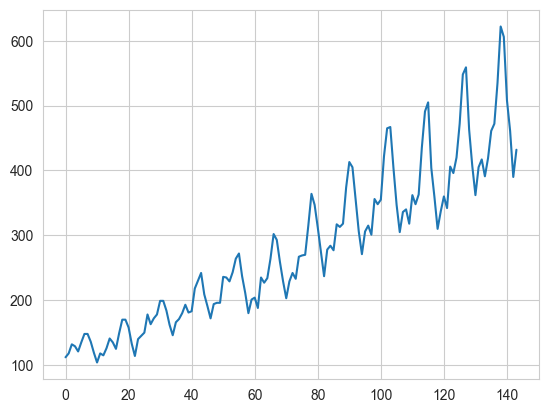

In [2]:
#load the dataset
training_set = pd.read_csv('../data/airline-passengers.csv')
training_set = training_set.iloc[:,1:2].values

plt.plot(training_set, label = 'Airlines Data')
plt.show()

In [3]:
'''
***Explain*** What is the sliding_windows function doing here?, and what does the seq_length value mean?
'''

seq_length = 5

def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)



sc = MinMaxScaler()
training_data = sc.fit_transform(training_set)

x, y = sliding_windows(training_data, seq_length)

train_size = int(len(y) * 0.67)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

## Model

In [4]:
# Define the LSTM Network
class LSTM(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        '''
        ***Explain*** Why do we need h_0 and c_0?
        '''
        
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        h_out = h_out.view(-1, self.hidden_size)
        out = self.fc(h_out)
        return out

## Training

In [5]:
num_epochs = 2000
learning_rate = 0.01

input_size = 1
hidden_size = 2
num_layers = 1
num_classes = 1

'''
***Explain*** Why are the input size and the num_classes equal to one?, should not it be input_size = seq_length? 
'''

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)
criterion = torch.nn.MSELoss()    
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 100 == 0 or epoch==0:
      print("Epoch: %d, loss: %1.5f" % (epoch+1, loss.item()))

Epoch: 1, loss: 0.05121
Epoch: 100, loss: 0.00240
Epoch: 200, loss: 0.00212
Epoch: 300, loss: 0.00194
Epoch: 400, loss: 0.00181
Epoch: 500, loss: 0.00175
Epoch: 600, loss: 0.00171
Epoch: 700, loss: 0.00169
Epoch: 800, loss: 0.00167
Epoch: 900, loss: 0.00166
Epoch: 1000, loss: 0.00165
Epoch: 1100, loss: 0.00164
Epoch: 1200, loss: 0.00163
Epoch: 1300, loss: 0.00162
Epoch: 1400, loss: 0.00161
Epoch: 1500, loss: 0.00160
Epoch: 1600, loss: 0.00160
Epoch: 1700, loss: 0.00159
Epoch: 1800, loss: 0.00158
Epoch: 1900, loss: 0.00157
Epoch: 2000, loss: 0.00157


## Testing for Airplane Passengers Dataset

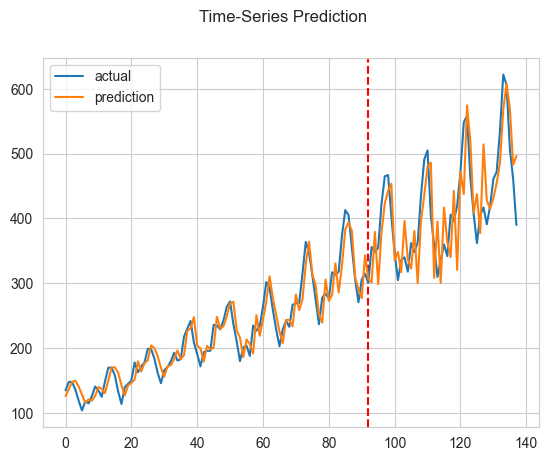

In [6]:
lstm.eval()
train_predict = lstm(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

#Plot the Predictions
plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot, label="actual")
plt.plot(data_predict, label="prediction")
plt.suptitle('Time-Series Prediction')
plt.legend()
plt.show()

In [7]:
'''
Implement MSE calculation for the test data
'''
test_criterion = nn.MSELoss()
test_pred = lstm(testX)
test_loss = test_criterion(test_pred, testY)
print(f"Test MSE: {test_loss.item():.5f}")

Test MSE: 0.01008


In [8]:
'''
***Explain*** Rerun your model with 5000 epochs. Do you notice something strange? If yes, provide an explanation.
'''
# Rerunning with 5000 epochs
num_epochs = 5000
learning_rate = 0.01

input_size = 1
hidden_size = 2
num_layers = 1
num_classes = 1

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)
criterion = torch.nn.MSELoss()    
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 100 == 0 or epoch==0:
      print("Epoch: %d, loss: %1.5f" % (epoch+1, loss.item()))

Epoch: 1, loss: 0.02359
Epoch: 100, loss: 0.00311
Epoch: 200, loss: 0.00265
Epoch: 300, loss: 0.00222
Epoch: 400, loss: 0.00191
Epoch: 500, loss: 0.00180
Epoch: 600, loss: 0.00176
Epoch: 700, loss: 0.00170
Epoch: 800, loss: 0.00164
Epoch: 900, loss: 0.00163
Epoch: 1000, loss: 0.00162
Epoch: 1100, loss: 0.00160
Epoch: 1200, loss: 0.00159
Epoch: 1300, loss: 0.00157
Epoch: 1400, loss: 0.00154
Epoch: 1500, loss: 0.00151
Epoch: 1600, loss: 0.00149
Epoch: 1700, loss: 0.00145
Epoch: 1800, loss: 0.00142
Epoch: 1900, loss: 0.00139
Epoch: 2000, loss: 0.00137
Epoch: 2100, loss: 0.00135
Epoch: 2200, loss: 0.00134
Epoch: 2300, loss: 0.00133
Epoch: 2400, loss: 0.00132
Epoch: 2500, loss: 0.00131
Epoch: 2600, loss: 0.00130
Epoch: 2700, loss: 0.00130
Epoch: 2800, loss: 0.00129
Epoch: 2900, loss: 0.00128
Epoch: 3000, loss: 0.00128
Epoch: 3100, loss: 0.00127
Epoch: 3200, loss: 0.00127
Epoch: 3300, loss: 0.00126
Epoch: 3400, loss: 0.00126
Epoch: 3500, loss: 0.00125
Epoch: 3600, loss: 0.00124
Epoch: 3700, 

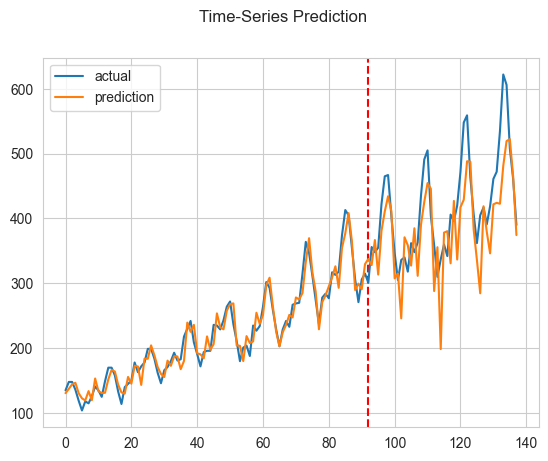

In [9]:
lstm.eval()
train_predict = lstm(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

#Plot the Predictions
plt.axvline(x=train_size, c='r', linestyle='--')
plt.plot(dataY_plot, label="actual")
plt.plot(data_predict, label="prediction")
plt.suptitle('Time-Series Prediction')
plt.legend()
plt.show()

In [10]:
test_criterion = nn.MSELoss()
test_pred = lstm(testX)
test_loss = test_criterion(test_pred, testY)
print(f"Test MSE: {test_loss.item():.5f}")

Test MSE: 0.01360


Epoch: 1, loss: 0.04830
Epoch: 100, loss: 0.00310
Epoch: 200, loss: 0.00244
Epoch: 300, loss: 0.00225
Epoch: 400, loss: 0.00206
Epoch: 500, loss: 0.00190
Epoch: 600, loss: 0.00176
Epoch: 700, loss: 0.00172
Epoch: 800, loss: 0.00171
Epoch: 900, loss: 0.00171
Epoch: 1000, loss: 0.00171
Epoch: 1100, loss: 0.00170
Epoch: 1200, loss: 0.00170
Epoch: 1300, loss: 0.00170
Epoch: 1400, loss: 0.00170
Epoch: 1500, loss: 0.00169
Epoch: 1600, loss: 0.00169
Epoch: 1700, loss: 0.00169
Epoch: 1800, loss: 0.00168
Epoch: 1900, loss: 0.00168
Epoch: 2000, loss: 0.00168
sl=3, hs=1: Test MSE = 0.00867
Epoch: 1, loss: 0.02402
Epoch: 100, loss: 0.00249
Epoch: 200, loss: 0.00183
Epoch: 300, loss: 0.00173
Epoch: 400, loss: 0.00171
Epoch: 500, loss: 0.00170
Epoch: 600, loss: 0.00168
Epoch: 700, loss: 0.00166
Epoch: 800, loss: 0.00164
Epoch: 900, loss: 0.00161
Epoch: 1000, loss: 0.00159
Epoch: 1100, loss: 0.00157
Epoch: 1200, loss: 0.00157
Epoch: 1300, loss: 0.00156
Epoch: 1400, loss: 0.00155
Epoch: 1500, loss: 0.

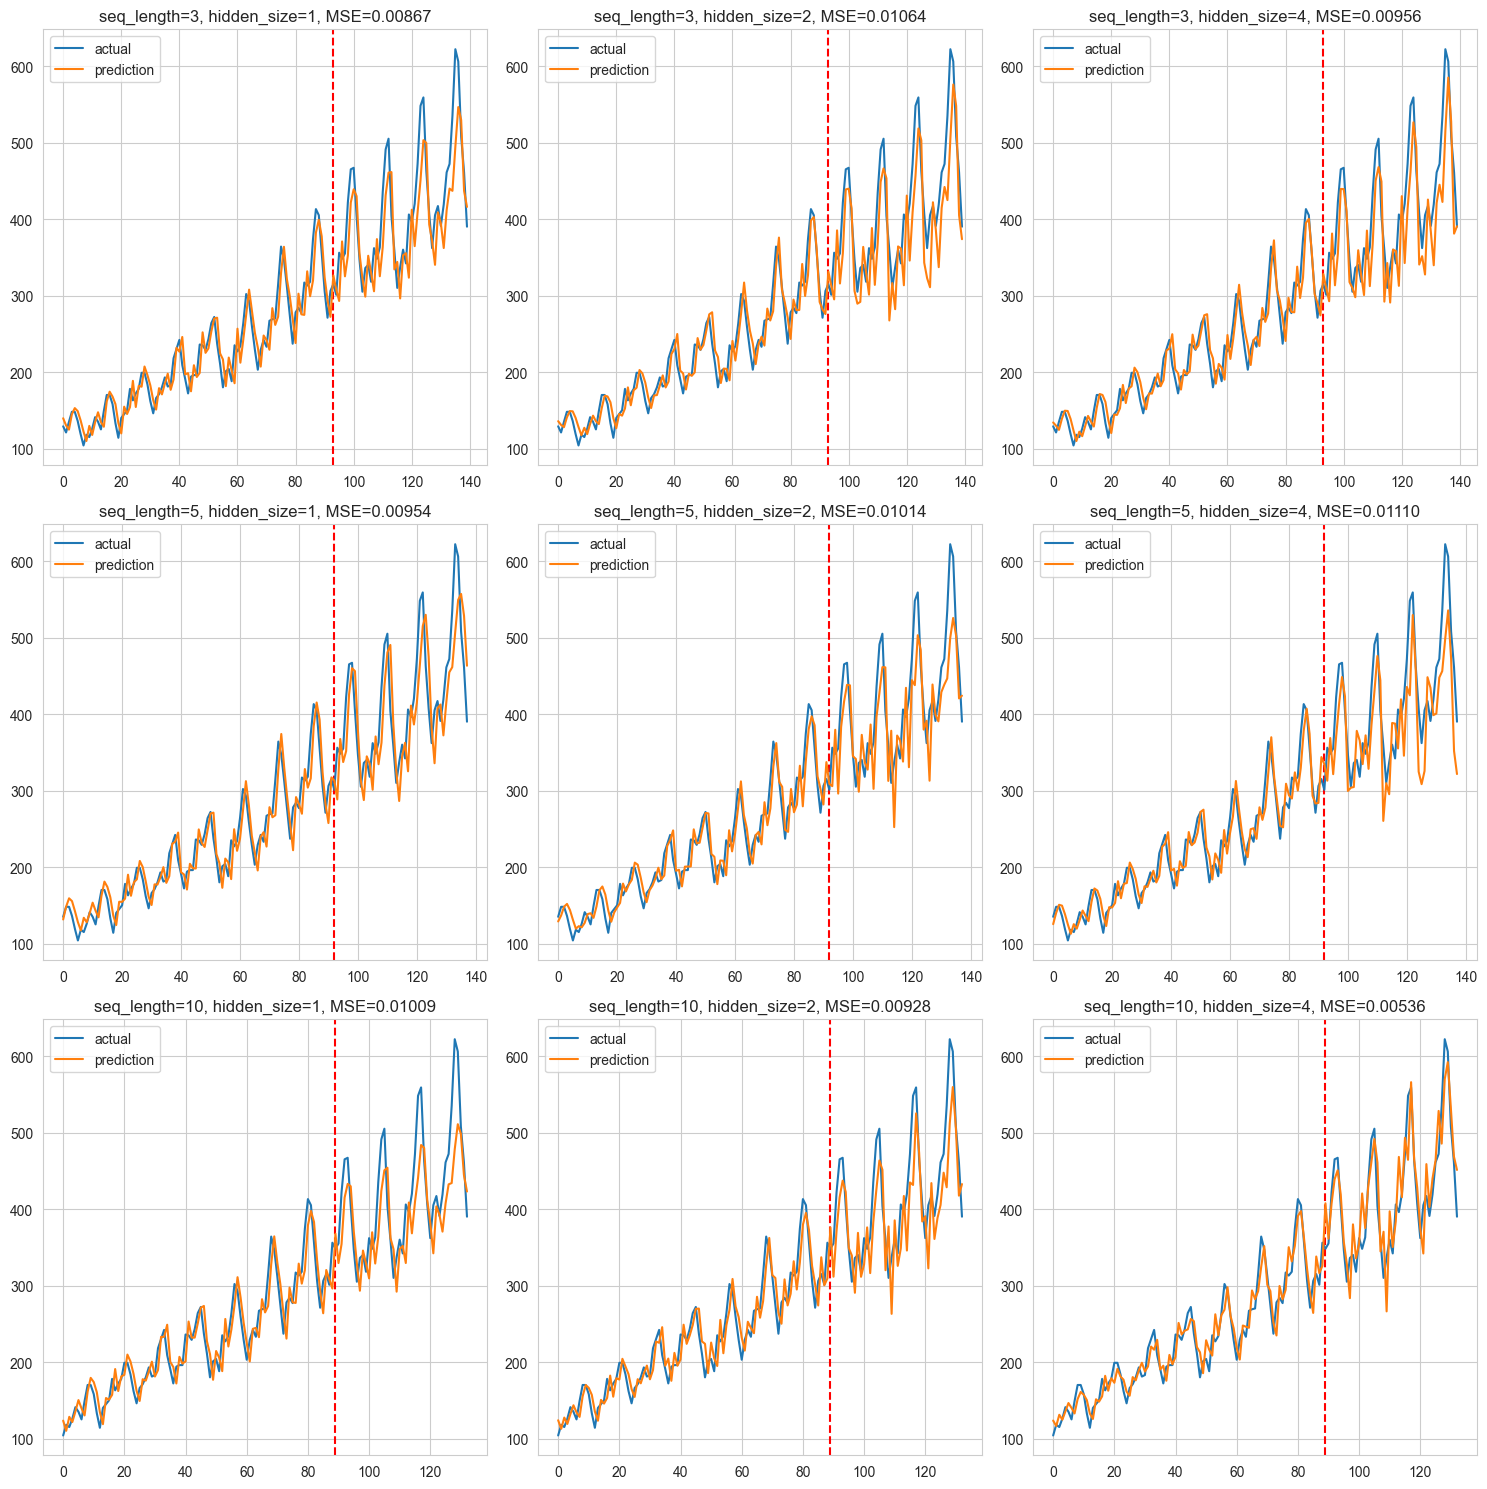

In [15]:
# Testing a grid
num_epochs = 2000
learning_rate = 0.01

l_seqs = [3, 5, 10]
hidden_sizes = [1, 2, 4]

input_size = 1
hidden_size = 2
num_layers = 1
num_classes = 1

test_criterion = nn.MSELoss()
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
subplot_idx = 0

best = [1000, 0, 0]

for seq_idx, seq_length in enumerate(l_seqs):
    sc = MinMaxScaler()
    training_data = sc.fit_transform(training_set)
    
    x, y = sliding_windows(training_data, seq_length)
    
    train_size = int(len(y) * 0.67)
    test_size = len(y) - train_size
    
    dataX = Variable(torch.Tensor(np.array(x)))
    dataY = Variable(torch.Tensor(np.array(y)))
    
    trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
    trainY = Variable(torch.Tensor(np.array(y[0:train_size])))
    
    testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
    testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))
    
    for hidden_idx, hidden_size in enumerate(hidden_sizes):
        lstm = LSTM(num_classes, input_size, hidden_size, num_layers)
        criterion = torch.nn.MSELoss()    
        optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
        
        # Train the model
        for epoch in range(num_epochs):
            outputs = lstm(trainX)
            optimizer.zero_grad()
            
            # obtain the loss function
            loss = criterion(outputs, trainY)
            loss.backward()
            optimizer.step()
            if (epoch+1) % 100 == 0 or epoch==0:
              print("Epoch: %d, loss: %1.5f" % (epoch+1, loss.item()))
        
        lstm.eval()
        train_predict = lstm(dataX)
        
        data_predict = train_predict.data.numpy()
        dataY_plot = dataY.data.numpy()
        
        data_predict = sc.inverse_transform(data_predict)
        dataY_plot = sc.inverse_transform(dataY_plot)
        
        #Calculate and display the test MSE
        test_pred = lstm(testX)
        test_loss = test_criterion(test_pred, testY)
        print(f"sl={seq_length}, hs={hidden_size}: Test MSE = {test_loss.item():.5f}")
        
        #Plot the Predictions
        ax = axs[seq_idx, hidden_idx]
        ax.axvline(x=train_size, c='r', linestyle='--')
        ax.plot(dataY_plot, label="actual")
        ax.plot(data_predict, label="prediction")
        ax.set_title(f'seq_length={seq_length}, hidden_size={hidden_size}, MSE={test_loss.item():.5f}')
        ax.legend()
        
        if test_loss.item() < best[0]:
            best[0] = test_loss.item()
            best[1] = seq_length
            best[2] = hidden_size
            
print(f"Best Performer: Test MSE={best[0]:.5f}, seq_length={best[1]}, hidden_size={best[2]}")
plt.tight_layout()
plt.show()